In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import simple_graph_modified as gs
import graph_search_skeleton as gss

In [2]:
img_size=  (480, 640) 

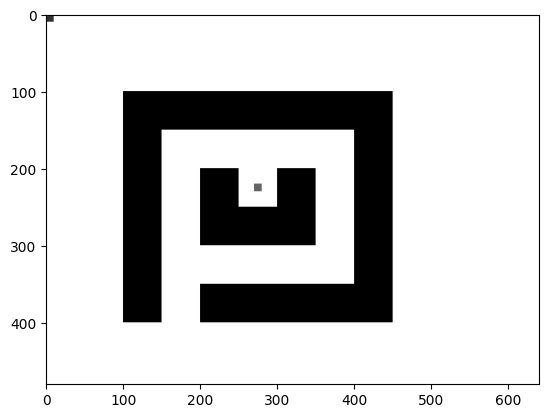

In [4]:
obstacle_1 = np.ones(img_size, dtype=np.uint8)*255
obstacle_1[100:150, 100:450] = 0
obstacle_1[150:400, 150:150] = 0
obstacle_1[150:400, 400:450] = 0
obstacle_1[350:400, 200:400] = 0
obstacle_1[100:400, 100:150] = 0
obstacle_1[200:300, 200:250] = 0
obstacle_1[250:300, 250:300] = 0
obstacle_1[200:300, 300:350] = 0
obstacle_1[220: 230, 270: 280] = 100
obstacle_1[0: 10, 0: 10] = 50
plt.imshow(obstacle_1, cmap='gray')

In [ ]:
left, right = np.arange(0, img_size[1], 10), np.arange(10, img_size[1]+10, 10)
graph = []

In [6]:
for i in range(img_size[0]//10):
    for j in range(len(left)):
        if ((64*i)+j)%64==0:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j]))
        else:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j]))
            graph[(64*i)+j-1].addUndirectedNeighbor(graph[(64*i)+j])   
        
        if i!=0:
            graph[(64*i)+j].addUndirectedNeighbor(graph[64*(i-1)+j])

In [7]:
print("Graph:")
for node in graph:
    s = "["
    for n in node.neighbors():
        s += str(n) + ", "
    s += "]"
    print(node, s)
    
print(graph[2].pre())

Graph:
0 (0, 10, 0, 10) inf -> -1 [1 (0, 10, 10, 20) inf -> -1, 64 (10, 20, 0, 10) inf -> -1, ]
1 (0, 10, 10, 20) inf -> -1 [0 (0, 10, 0, 10) inf -> -1, 2 (0, 10, 20, 30) inf -> -1, 65 (10, 20, 10, 20) inf -> -1, ]
2 (0, 10, 20, 30) inf -> -1 [1 (0, 10, 10, 20) inf -> -1, 3 (0, 10, 30, 40) inf -> -1, 66 (10, 20, 20, 30) inf -> -1, ]
3 (0, 10, 30, 40) inf -> -1 [2 (0, 10, 20, 30) inf -> -1, 4 (0, 10, 40, 50) inf -> -1, 67 (10, 20, 30, 40) inf -> -1, ]
4 (0, 10, 40, 50) inf -> -1 [3 (0, 10, 30, 40) inf -> -1, 5 (0, 10, 50, 60) inf -> -1, 68 (10, 20, 40, 50) inf -> -1, ]
5 (0, 10, 50, 60) inf -> -1 [4 (0, 10, 40, 50) inf -> -1, 6 (0, 10, 60, 70) inf -> -1, 69 (10, 20, 50, 60) inf -> -1, ]
6 (0, 10, 60, 70) inf -> -1 [5 (0, 10, 50, 60) inf -> -1, 7 (0, 10, 70, 80) inf -> -1, 70 (10, 20, 60, 70) inf -> -1, ]
7 (0, 10, 70, 80) inf -> -1 [6 (0, 10, 60, 70) inf -> -1, 8 (0, 10, 80, 90) inf -> -1, 71 (10, 20, 70, 80) inf -> -1, ]
8 (0, 10, 80, 90) inf -> -1 [7 (0, 10, 70, 80) inf -> -1, 9 (0, 1

In [8]:
print(graph[1435])

1435 (220, 230, 270, 280) inf -> -1


In [ ]:
48*64

3072

In [9]:
gss.bfs(graph, verbose=True)

In [10]:
graph[1435].visited()

True

In [14]:
node = graph[1435]
while node.parent()!=-1:
    # print(node.parent().id())
    node = node.parent()
    x1, y1, x2, y2 = node.get_coordinates()
    # print(y1, y2, x1, x2)
    obstacle_1[y1:y2, x1:x2] = 20
    

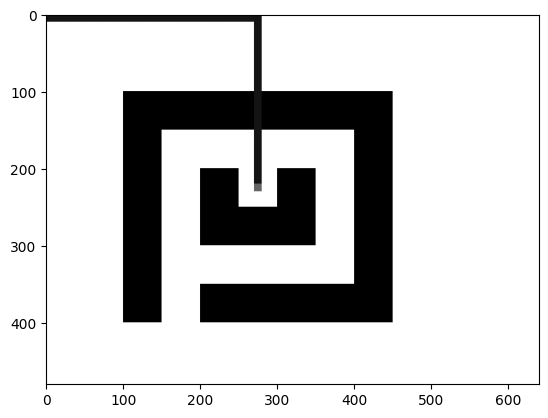

In [15]:
plt.imshow(obstacle_1, cmap='gray')